# Quantum Channel for the Ancilla Density Matrix in Random Unitary Circuit

![](RUC.png)

We are going to evaluate the effect of the matrices along the diagonal slice on the ancilla density matrix. After summing over the indices $(s_1,s_2)$ for a neighbouring pair of sites we lose the final layer by unitarity, and we are left with:

![](MPO.png)

The input ancilla density matrix $\rho_{a_1a_2a_3,\bar a_1\bar a_2 \bar a_3}$ will be contracted in at the bottom, and the indices of the output matrix $\rho'_{b_1b_2b_3,\bar b_1\bar b_2 \bar b_3}$ will pop out of the top. The task is to evaluate $\rho'$ for a given assignment of indices $b_j$ if all components of $\rho$ are known.

The first thing to notice is that the final index is traced over, lowering the dimension of the density matrix before we start. We then work from the [middle out](https://www.youtube.com/watch?v=0rhdOt9bOHE), contracting in a $U$ and $\bar U$ at each step. This is an $O(N^2)$ operation, where $N=q^d$ for depth $d$.

In [1]:
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

In [2]:
from ruc_einsum import ruc_channel, tensor_trace, trace_square, matrix_to_tensor, tensor_to_matrix, random_ρ

## Complexity

In [5]:
timeit_results = []
q = 2
depths =  np.arange(5,13)
for d in depths:
    res = %timeit -o ruc_channel(random_ρ(q, d))
    timeit_results.append(res.average)

1.02 ms ± 18.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.47 ms ± 77 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.05 ms ± 1.55 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
29.7 ms ± 633 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
119 ms ± 2.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
464 ms ± 6.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.85 s ± 13.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.93 s ± 60.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Check the $4^d$ scaling

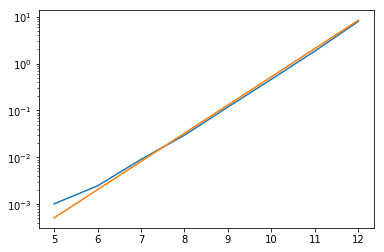

In [6]:
plt.semilogy(depths, timeit_results, depths, 0.0000005*4**depths)

## Purity

In [ ]:
q = 2
depth = 10
# ρ = np.zeros(2*depth*[q])
# ρ[tuple(2*depth*[0])] = 1
ρ = random_ρ(q, depth)
purity_trace = np.array([])
eigenvalues = np.array([])

for step in range(10000):
    purity_trace = np.append(purity_trace, trace_square(ρ))
    if step % 10 == 0:
        print("step ", step)
        eigenvalues = np.concatenate([eigenvalues, eigh(tensor_to_matrix(ρ), eigvals_only=True)])
    ρ = ruc_channel(ρ)

step  0
step  10
step  20
step  30


Text(0, 0.5, 'Purity')

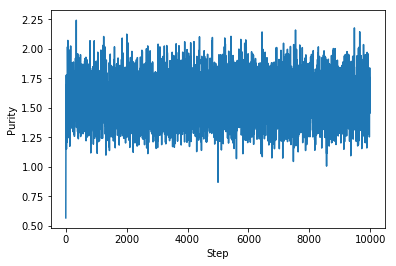

In [77]:
plt.plot(-np.log(purity_trace))
plt.xlabel("Step")
plt.ylabel("Purity")

## Spectrum

(array([4.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        7.0000e+00, 8.0000e+00, 8.0000e+00, 2.1000e+01, 2.4000e+01,
        1.2000e+01, 1.1000e+01, 1.9000e+01, 2.0000e+01, 3.7000e+01,
        4.5000e+01, 5.5000e+01, 6.6000e+01, 9.9000e+01, 1.3600e+02,
        1.5300e+02, 1.3300e+02, 1.8900e+02, 3.1800e+02, 3.6100e+02,
        4.3300e+02, 5.3200e+02, 5.5500e+02, 6.4800e+02, 8.2100e+02,
        1.0140e+03, 1.2200e+03, 1.4410e+03, 1.7050e+03, 1.9870e+03,
        2.3550e+03, 2.7570e+03, 3.1980e+03, 3.6530e+03, 4.3420e+03,
        5.0750e+03, 5.7820e+03, 6.8570e+03, 7.7030e+03, 8.6110e+03,
        9.6600e+03, 1.0793e+04, 1.1713e+04, 1.2636e+04, 1.3584e+04,
        1.4398e+04, 1.5090e+04, 1.5278e+04, 1.5453e+04, 1.5491e+04,
        1.5166e+04, 1.4840e+04, 1.4162e+04, 1.3056e+04, 1.2071e+04,
        1.1372e+04, 1.0818e+04, 1.0811e+04, 1.2200e+04, 1.4666e+04,
        1.7846e+04, 2.0501e+04, 2.2190e+04, 2.20

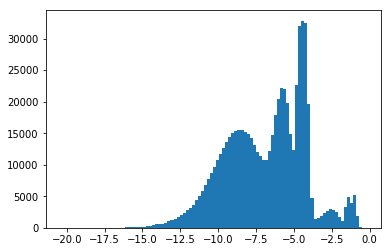

In [76]:
plt.hist(np.log(eigenvalues), bins=100)

Compare with fully random density matrix

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   1.,   2.,   1.,   2.,   4.,   3.,   4.,   8.,  10.,  12.,
         17.,  23.,  33.,  44.,  63.,  84., 112., 154., 210., 285., 381.,
        505., 652., 778., 691.,  14.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-31.33488336, -30.71393699, -30.09299061, -29.47204423,
        -28.85109785, -28.23015147, -27.60920509, -26.98825871,
        -26.36731233, -25.74636595, -25.12541957, -24.5044732 ,
        -23.88352682, -23.26258044, -22.64163406, -22.02068768,
        -21.3997413 , -20.77879492, -20.15784854, -19.53690216,
        -18.91595578, -18.29500941, -17.67406303, -17.05311665,
        -16.43217027, -15.81122389, -15.19027751, -14.56933113,
        -13.94838475, -13.32743837, -12.70649199, -12.08554562,
        -11.46459924, -10.84365286, -10.22270648,  -9.6017601 ,
         -8.98081372,  -8.35986734,  -7.73892096,  -7.11797458,
         -6.497028

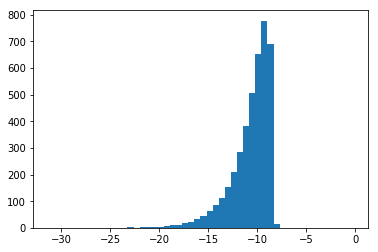

In [62]:
plt.hist(np.log(eigh(tensor_to_matrix(random_ρ(2, 12)), eigvals_only=True)), bins=50)